## CMN214 Lab 3

- **Name**: Chen Luo


- **Date**: Feb. 18, 2020

In [2]:
# load packages
library(sna)
library(network)

Loading required package: statnet.common

Attaching package: ‘statnet.common’

The following object is masked from ‘package:base’:

    order

Loading required package: network
network: Classes for Relational Data
Version 1.16.0 created on 2019-11-30.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.

sna: Tools for Social Network Analysis
Version 2.5 created on 2019-12-09.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.



---
### 1. Read the CEOs & Clubs data into a R data frame
---

In [3]:
ceosClubs <- read.table(file='./Lab3CEOs.csv', 
                        header=TRUE, 
                        row.names=1,  # need to set the row names, because the first column does not contain relationships
                        stringsAsFactors=FALSE, 
                        nrows=27, 
                        sep=',')
# take a look at the first six rows
head(ceosClubs)

,club.1,club.2,club.3,club.4,club.5,club.6,club.7,club.8,club.9,club.10,club.11,club.12,club.13,club.14,club.15
CEO-1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
CEO-2,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
CEO-3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
CEO-4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
CEO-5,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
CEO-6,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [4]:
# num of rows and columns of this data frame 
dim(ceosClubs)
# result shows there are 26 CEOs (actors) and 15 clubs (events) in this data

[1] 26 15

In [5]:
# data type of each column
str(ceosClubs)

'data.frame':	26 obs. of  15 variables:
 $ club.1 : int  0 0 0 0 0 0 0 0 1 0 ...
 $ club.2 : int  0 0 0 1 0 1 0 0 0 0 ...
 $ club.3 : int  1 1 1 1 1 1 1 0 0 1 ...
 $ club.4 : int  1 0 0 0 0 0 1 1 1 0 ...
 $ club.5 : int  0 1 0 0 0 0 0 0 0 0 ...
 $ club.6 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ club.7 : int  0 1 0 0 0 0 0 1 0 0 ...
 $ club.8 : int  0 0 0 0 0 0 0 0 1 0 ...
 $ club.9 : int  1 0 0 0 0 0 0 0 0 1 ...
 $ club.10: int  0 0 0 0 0 0 1 1 1 0 ...
 $ club.11: int  0 0 0 0 0 0 1 0 0 0 ...
 $ club.12: int  0 0 1 0 0 0 0 0 0 0 ...
 $ club.13: int  0 0 0 0 1 0 0 0 0 0 ...
 $ club.14: int  0 0 0 0 1 1 0 0 0 0 ...
 $ club.15: int  0 0 0 1 0 0 0 0 0 0 ...


---
### 2. Store the data into a directed, bipartite (two‐mode) network object
---

In [6]:
# turn the data frame into a network object
net <- network(ceosClubs, 
               directed=TRUE,  # logical, should edges be interpreted as directed?
               loops=FALSE,  # logical, should loops be allowed?
               bipartite=TRUE,  # the data contains both actors and events, so the `directed=TRUE` is not valid
               matrix.type='adjacency')  # data is composed of 0 and 1
# examine the new network
# bipartite = 26 means the first 26 nodes are actors and the remaining 15 nodes are events
summary(net)

Network attributes:
  vertices = 41
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = 26
 total edges = 98 
   missing edges = 0 
   non-missing edges = 98 
 density = 0.1195122 

Vertex attributes:
  vertex.names:
   character valued attribute
   41 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]   29    1
 [2,]   30    1
 [3,]   35    1
 [4,]   29    2
 [5,]   31    2
 [6,]   33    2
 [7,]   29    3
 [8,]   38    3
 [9,]   28    4
[10,]   29    4
[11,]   41    4
[12,]   29    5
[13,]   39    5
[14,]   40    5
[15,]   28    6
[16,]   29    6
[17,]   40    6
[18,]   29    7
[19,]   30    7
[20,]   36    7
[21,]   37    7
[22,]   30    8
[23,]   33    8
[24,]   36    8
[25,]   27    9
[26,]   30    9
[27,]   34    9
[28,]   36    9
[29,]   29   10
[30,]   35   10
[31,]   28   11
[32,]   29   11
[33,]   35   11
[34,]   30   12
[35,]   33   12
[36,]   29   13
[37,]   30   13
[38,]   31   13
[39,]   35   13
[40,]   28

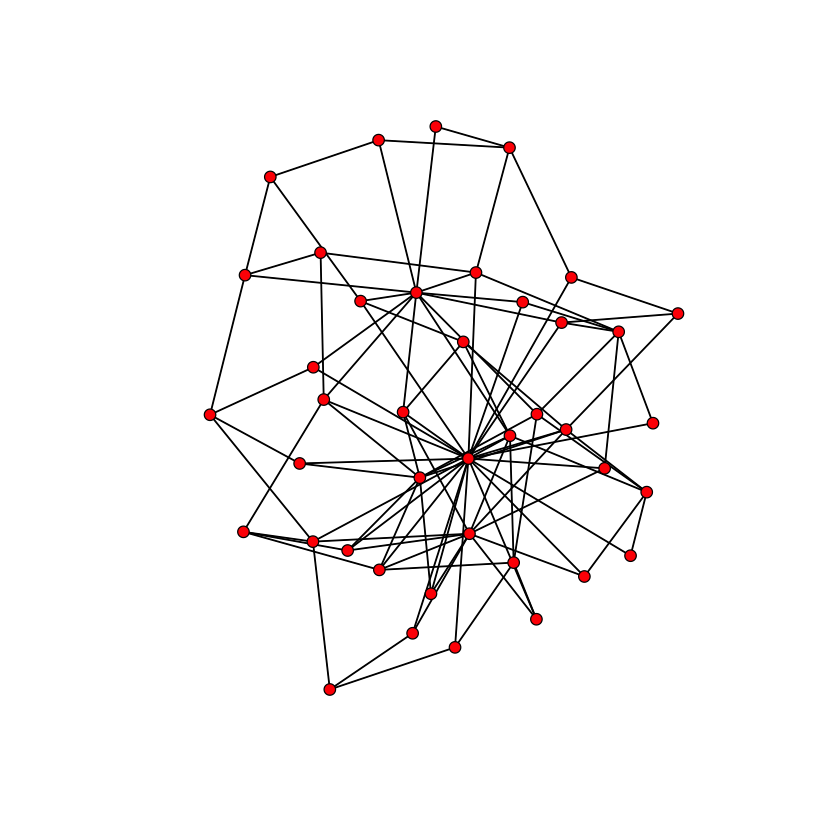

In [7]:
# display the very rough network vis
plot(net)

---
### 3. Compute a one‐mode projection of the affiliation network
---

- A CEO‐by‐CEO club co‐membership network

In [8]:
# project the affiliation network onto one mode
# need to multiply the matrices, first, turn the network object into matrix
net.matrix <- as.matrix.network(net)
# multiply the matrix by its transposed
ceo.net <- net.matrix %*% t(net.matrix)
# take a look at the matrix
ceo.net

,CEO-1,CEO-2,CEO-3,CEO-4,CEO-5,CEO-6,CEO-7,CEO-8,CEO-9,CEO-10,⋯,CEO-17,CEO-18,CEO-19,CEO-20,CEO-21,CEO-22,CEO-23,CEO-24,CEO-25,CEO-26
CEO-1,3,1,1,1,1,1,2,1,1,2,⋯,1,2,3,2,2,1,1,2,1,1
CEO-2,1,3,1,1,1,1,1,1,0,1,⋯,2,0,2,1,1,1,1,1,1,1
CEO-3,1,1,2,1,1,1,1,0,0,1,⋯,2,1,1,1,1,1,1,1,1,2
CEO-4,1,1,1,3,1,2,1,0,0,1,⋯,3,1,1,3,1,2,3,2,2,2
CEO-5,1,1,1,1,3,2,1,0,0,1,⋯,1,1,1,1,1,1,1,1,2,1
CEO-6,1,1,1,2,2,3,1,0,0,1,⋯,2,0,1,2,1,1,2,1,2,2
CEO-7,2,1,1,1,1,1,4,2,2,1,⋯,2,1,2,3,2,1,1,2,1,1
CEO-8,1,1,0,0,0,0,2,3,2,0,⋯,0,1,2,1,1,0,0,1,0,0
CEO-9,1,0,0,0,0,0,2,2,4,0,⋯,0,1,2,1,2,1,0,2,0,0
CEO-10,2,1,1,1,1,1,1,0,0,2,⋯,1,1,2,1,1,1,1,1,1,1


---
### 4. Dichotomize the affiliation network
---

- Using 2 as a threshold (keep the link between two actors only if they share more than 2 events)


- For steps 5 to 10, use the dichotomized network

In [9]:
# dichotomize the valued network of shared clubs for the CEOs
# set the cutoff point threshold as 2
ceo.net[,] <- event2dichot(ceo.net, 
                           method='absolute', 
                           thresh=2)
# turn the dichotomized matrix into a network
ceo.net <- as.network.matrix(ceo.net, 
                             directed=FALSE)
# examine the network
summary(ceo.net)

Network attributes:
  vertices = 26
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 33 
   missing edges = 0 
   non-missing edges = 33 
 density = 0.1015385 

Vertex attributes:
  vertex.names:
   character valued attribute
   26 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]   13    1
 [2,]   19    1
 [3,]   14    4
 [4,]   15    4
 [5,]   17    4
 [6,]   20    4
 [7,]   23    4
 [8,]   16    6
 [9,]   14    7
[10,]   20    7
[11,]   19   13
[12,]   15   14
[13,]   17   14
[14,]   18   14
[15,]   20   14
[16,]   23   14
[17,]   24   14
[18,]   25   14
[19,]   26   14
[20,]   16   15
[21,]   17   15
[22,]   20   15
[23,]   23   15
[24,]   24   15
[25,]   25   15
[26,]   23   16
[27,]   20   17
[28,]   23   17
[29,]   26   17
[30,]   24   19
[31,]   23   20
[32,]   24   20
[33,]   24   23

In [10]:
# take a look at the network data
ceo.net[,]

,CEO-1,CEO-2,CEO-3,CEO-4,CEO-5,CEO-6,CEO-7,CEO-8,CEO-9,CEO-10,⋯,CEO-17,CEO-18,CEO-19,CEO-20,CEO-21,CEO-22,CEO-23,CEO-24,CEO-25,CEO-26
CEO-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
CEO-2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CEO-3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CEO-4,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,1,0,0,1,0,0,0
CEO-5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CEO-6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CEO-7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
CEO-8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CEO-9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CEO-10,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


---
### 5. Compute the network density
---

In [11]:
# this is a symmetric network, so mode = "graph"
round(gden(ceo.net, mode="graph"), digits=4)

[1] 0.1015

---
### 6. Compute degree and betweenness node centrality and network centralization scores
---

In [12]:
# this is a symmetric network, so gmode = "graph"
# calculate degree centrality of each node
degree(ceo.net, gmode="graph")

[1]  2  0  0  5  0  1  2  0  0  0  0  0  2 10  8  3  6  1  3  7  0  0  7  5  2
[26]  2

In [13]:
# calculate betweenness centrality of each node
betweenness(ceo.net, gmode="graph")

[1]  0  0  0  0  0  0  0  0  0  0  0  0  0 35 19 14  3  0 26  7  0  0 13 36  0
[26]  0

In [14]:
# calculate network's degree centralization
round(centralization(ceo.net, FUN=degree, mode="graph"), digits=4)

[1] 0.3233

In [15]:
# calculate network's betweenness centralization
round(centralization(ceo.net, FUN=betweenness, mode="graph"), digits=4)

[1] 0.1044

In [16]:
# calculate network's closeness centralization
round(centralization(ceo.net, FUN=closeness, mode="graph"), digits=4)

[1] 0

---
### 7. Compute the network transitivity
---

In [17]:
# transitivity is a triadic, algebraic structural constraint
# measure = "weak" means the fraction of potentially intransitive triads obeying the weak condition will be returned
round(gtrans(ceo.net, 
       mode="graph",  # this network is a undirected graph, it means undirected triads are sought
       measure="weak"), digits=4)

Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”

[1] 0.5776

In [18]:
# measure = "weakcensus" returns the number of weakly transitive triads
gtrans(ceo.net, 
       mode="graph", 
       measure="weakcensus")

Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”

[1] 186

In [19]:
# measure = "strong" returns proportion of triads where a->b->c <=> a->c
round(gtrans(ceo.net, 
       mode="graph", 
       measure="strong"), digits=4)

Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”

[1] 0.9017

In [20]:
# measure = "strongcensus" returns the number of strongly transitive triads
gtrans(ceo.net, 
       mode="graph", 
       measure="strongcensus")

Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”Warning message in if (is.edgelist.sna(z)) {:
“the condition has length > 1 and only the first element will be used”

[1] 14066

---
### 8. Identify cliques in the network
---

- Add a comment in your R script briefly explaining the meaning of the results (i.e. how many cliques, what kind, where should one look for the clique comembership scores and the list of all cliques)

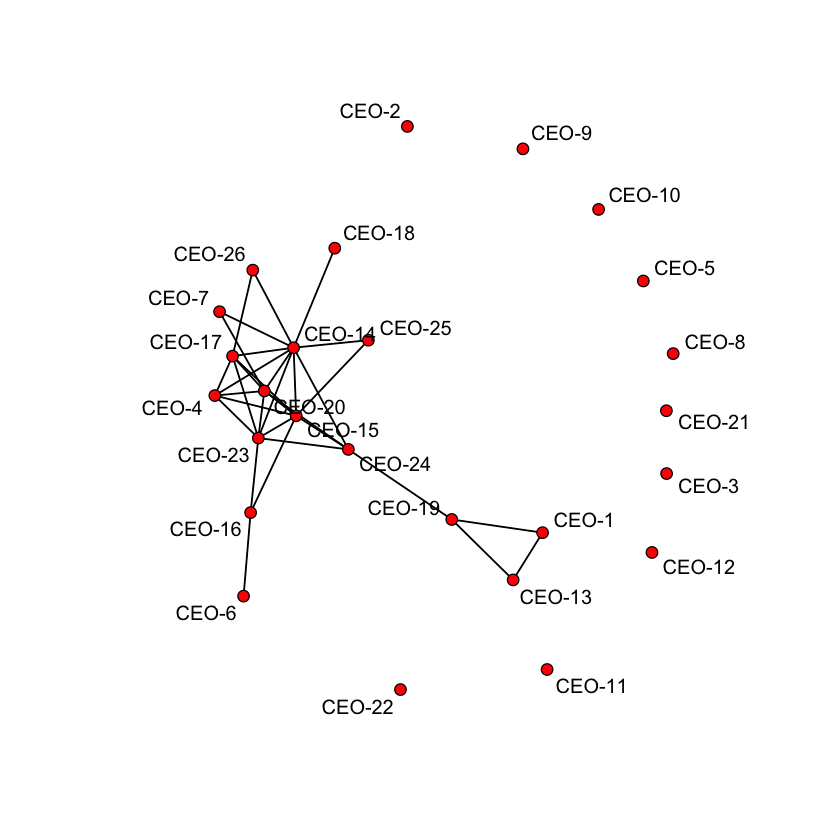

In [21]:
# a rough network helps to understand the cliques
plot(ceo.net, 
     displaylabels=TRUE)

In [22]:
# clique.comembership = "sum" returns the total number of shared cliques for each pair of nodes
ceo.net.cliques <- clique.census(ceo.net, 
                                 mode="graph", 
                                 clique.comembership="sum")
# returns an object contains the result of the clique census
ceo.net.cliques

# conclusions from the results
# 1. There are 10 + 3 + 5 + 1 + 1 = 20 cliques in this network

# 2. Among the cliques, 10 cliques have only 1 node (isolated nodes in the above figure)
# ...3 cliques have 2 nodes
# ...5 cliques have 3 nodes
# ...1 clique has 5 nodes and 1 clique has 6 nodes

# 3. the second element of this result is the clique co-membership matrix, which contains the clique comembership scores
# ...also, it can be accessd by `ceo.net.cliques$clique.comemb`

# 4. the third element of this result is a list of all found cliques
# ...also, it can be accessed by `ceo.net.cliques$cliques`

,Agg,CEO-1,CEO-2,CEO-3,CEO-4,CEO-5,CEO-6,CEO-7,CEO-8,CEO-9,⋯,CEO-17,CEO-18,CEO-19,CEO-20,CEO-21,CEO-22,CEO-23,CEO-24,CEO-25,CEO-26
1,10,0,1,1,0,1,0,0,1,1,⋯,0,0,0,0,1,1,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,⋯,0,1,1,0,0,0,0,1,0,0
3,5,1,0,0,0,0,0,1,0,0,⋯,1,0,1,1,0,0,1,0,1,1
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,1,1,0,0
6,1,0,0,0,1,0,0,0,0,0,⋯,1,0,0,1,0,0,1,0,0,0
,CEO-1,CEO-2,CEO-3,CEO-4,CEO-5,CEO-6,CEO-7,CEO-8,CEO-9,CEO-10,⋯,CEO-17,CEO-18,CEO-19,CEO-20,CEO-21,CEO-22,CEO-23,CEO-24,CEO-25,CEO-26
CEO-1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
CEO-2,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CEO-3,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [23]:
# return the clique comembership scores
ceo.net.cliques$clique.comemb

,CEO-1,CEO-2,CEO-3,CEO-4,CEO-5,CEO-6,CEO-7,CEO-8,CEO-9,CEO-10,⋯,CEO-17,CEO-18,CEO-19,CEO-20,CEO-21,CEO-22,CEO-23,CEO-24,CEO-25,CEO-26
CEO-1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
CEO-2,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CEO-3,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CEO-4,0,0,0,1,0,0,0,0,0,0,⋯,1,0,0,1,0,0,1,0,0,0
CEO-5,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CEO-6,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CEO-7,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
CEO-8,0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CEO-9,0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
CEO-10,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0


In [24]:
# return the list of all cliques
ceo.net.cliques$cliques

[[1]]
[[1]][[1]]
[1] 22

[[1]][[2]]
[1] 21

[[1]][[3]]
[1] 12

[[1]][[4]]
[1] 11

[[1]][[5]]
[1] 10

[[1]][[6]]
[1] 9

[[1]][[7]]
[1] 8

[[1]][[8]]
[1] 5

[[1]][[9]]
[1] 3

[[1]][[10]]
[1] 2


[[2]]
[[2]][[1]]
[1] 19 24

[[2]][[2]]
[1]  6 16

[[2]][[3]]
[1] 14 18


[[3]]
[[3]][[1]]
[1]  7 14 20

[[3]][[2]]
[1] 14 17 26

[[3]][[3]]
[1] 14 15 25

[[3]][[4]]
[1] 15 16 23

[[3]][[5]]
[1]  1 13 19


[[4]]
NULL

[[5]]
[[5]][[1]]
[1] 14 15 20 23 24


[[6]]
[[6]][[1]]
[1]  4 14 15 17 20 23

---
### 9. Compute the structural similarity between nodes using product‐moment correlation
---

In [25]:
# structural similarity is a part of structural equivalence, `method = correlation` means product-moment correlation
round(sedist(ceo.net, 
       mode="graph", 
       method="correlation"), digits=4)

Warning message in cor(v, use = "pairwise"):
“the standard deviation is zero”

1.0000,0,0,-0.1547,0,-0.0629,-0.0909,0,0,0,⋯,-0.1741,-0.0629,0.6916,-0.1935,0,0,-0.1935,0.2165,-0.0909,-0.0909
0.0000,0,0,0.0000,0,0.0000,0.0000,0,0,0,⋯,0.0000,0.0000,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,0.0000
0.0000,0,0,0.0000,0,0.0000,0.0000,0,0,0,⋯,0.0000,0.0000,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,0.0000
-0.1547,0,0,1.0000,0,-0.1070,0.5878,0,0,0,⋯,0.8718,0.4065,-0.1939,0.7746,0,0,0.7746,0.7474,0.5878,0.5878
0.0000,0,0,0.0000,0,0.0000,0.0000,0,0,0,⋯,0.0000,0.0000,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,0.0000
-0.0629,0,0,-0.1070,0,1.0000,-0.0629,0,0,0,⋯,-0.1204,-0.0435,-0.0788,-0.1338,0,0,0.3249,-0.1070,-0.0629,-0.0629
-0.0909,0,0,0.5878,0,-0.0629,1.0000,0,0,0,⋯,0.5222,0.6916,-0.1140,0.3612,0,0,0.4699,0.5878,0.4545,0.4545
0.0000,0,0,0.0000,0,0.0000,0.0000,0,0,0,⋯,0.0000,0.0000,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,0.0000
0.0000,0,0,0.0000,0,0.0000,0.0000,0,0,0,⋯,0.0000,0.0000,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,0.0000
0.0000,0,0,0.0000,0,0.0000,0.0000,0,0,0,⋯,0.0000,0.0000,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,0.0000
0.0000,0,0,0.0000,0,0.0000,0.0000,0,0,0,⋯,0.0000,0.0000,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,0.0000


---
### 10. Plot the dichotomized network
---

- Hide the arrows from edges. 


- Change node size according to degree centrality. 


- Change the node color to your favorite (R‐supported) tone.


- Save the result as a PDF.

In [26]:
# use the help function to find more parameters
?sna::gplot

In [27]:
list.network.attributes(ceo.net)

[1] "bipartite" "directed"  "hyper"     "loops"     "mnext"     "multiple" 
[7] "n"

> set node color by degree centrality

In [28]:
set.vertex.attribute(ceo.net, "degree.centrality", degree(ceo.net, gmode="graph"))
summary(ceo.net)

Network attributes:
  vertices = 26
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 33 
   missing edges = 0 
   non-missing edges = 33 
 density = 0.1015385 

Vertex attributes:

 degree.centrality:
   numeric valued attribute
   attribute summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   2.000   2.538   4.500  10.000 
  vertex.names:
   character valued attribute
   26 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]   13    1
 [2,]   19    1
 [3,]   14    4
 [4,]   15    4
 [5,]   17    4
 [6,]   20    4
 [7,]   23    4
 [8,]   16    6
 [9,]   14    7
[10,]   20    7
[11,]   19   13
[12,]   15   14
[13,]   17   14
[14,]   18   14
[15,]   20   14
[16,]   23   14
[17,]   24   14
[18,]   25   14
[19,]   26   14
[20,]   16   15
[21,]   17   15
[22,]   20   15
[23,]   23   15
[24,]   24   15
[25,]   25   15
[26,]   23   16
[27,]   20   17
[28,]   23   17
[29,]   26   1

In [29]:
get.vertex.attribute(ceo.net, "degree.centrality")

[1]  2  0  0  5  0  1  2  0  0  0  0  0  2 10  8  3  6  1  3  7  0  0  7  5  2
[26]  2

In [30]:
node_colors <- rep("", get.network.attribute(ceo.net, "n"))
for (i in 1: get.network.attribute(ceo.net, "n")){
    if (get.vertex.attribute(ceo.net, "degree.centrality")[i] < 2.538){  # use the mean value of degree centrality as a threshold
        node_colors[i] <- "lightblue"
    } else {
        node_colors[i] <- "maroon"
    }
}
print(node_colors)

 [1] "lightblue" "lightblue" "lightblue" "maroon"    "lightblue" "lightblue"
 [7] "lightblue" "lightblue" "lightblue" "lightblue" "lightblue" "lightblue"
[13] "lightblue" "maroon"    "maroon"    "maroon"    "maroon"    "lightblue"
[19] "maroon"    "maroon"    "lightblue" "lightblue" "maroon"    "maroon"   
[25] "lightblue" "lightblue"


> set node size by degree centrality, and apply some tiny adjustments, or the isolated nodes will be invisible

In [31]:
node_sizes <- rep(1, get.network.attribute(ceo.net, "n"))
for (i in 1: get.network.attribute(ceo.net, "n")){
    if (get.vertex.attribute(ceo.net, "degree.centrality")[i] == 0){  # adjustments for isolated nodes
        node_sizes[i] <- 0.2
    } else {
        node_sizes[i] <- get.vertex.attribute(ceo.net, "degree.centrality")[i] / 4  # avoid too large nodes
    }
}
print(node_sizes)

 [1] 0.50 0.20 0.20 1.25 0.20 0.25 0.50 0.20 0.20 0.20 0.20 0.20 0.50 2.50 2.00
[16] 0.75 1.50 0.25 0.75 1.75 0.20 0.20 1.75 1.25 0.50 0.50


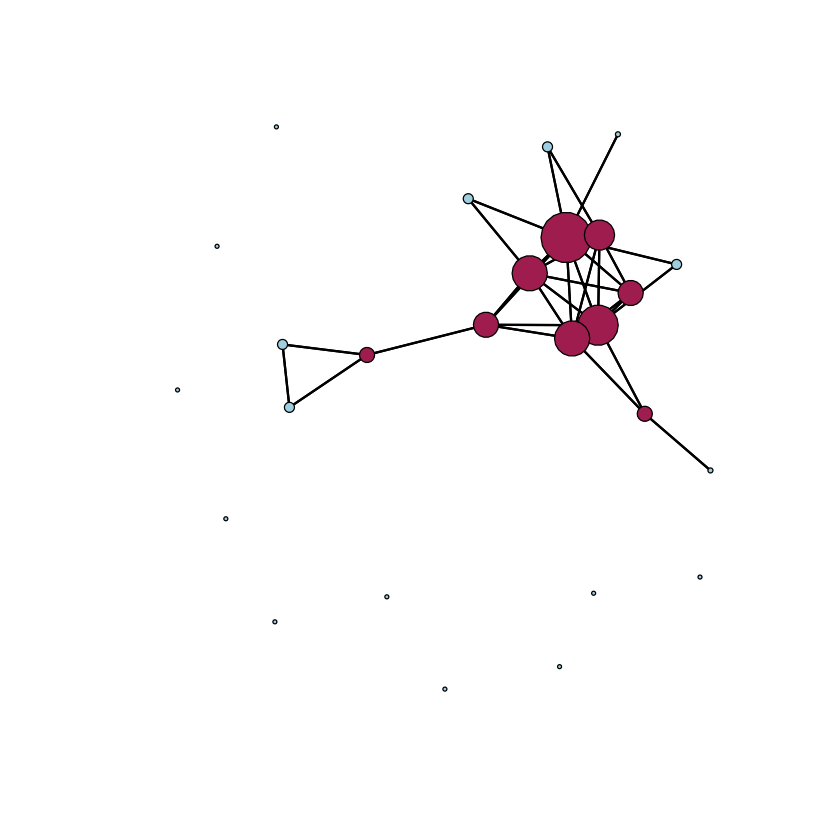

In [32]:
# draw the network
gplot(ceo.net, 
      gmode="graph", 
      vertex.cex=node_sizes, 
      vertex.sides=18, 
      usearrows=FALSE,  # arrows are not needed for indicating edges
      vertex.col=node_colors)

In [33]:
# save the result as PDF
# start a graphic device
pdf("./vis.pdf")
# network goes to PDF
gplot(ceo.net, gmode="graph", vertex.cex=node_sizes, vertex.sides=18, usearrows=FALSE, vertex.col=node_colors)
dev.off()

pdf 
  2